* CNN classifier in keras w/ Sequential

* Model evaluation & prediction

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.5.0'

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

In [4]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [7]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=[acc, mae]
    )

In [9]:
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


In [10]:
from tensorflow.keras.preprocessing import image

In [12]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist

In [13]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [17]:
print(train_labels[0])

9


Rescale image values so that they are between 0 and 1

In [18]:
train_images = train_images / 255.
test_images = test_images / 255.

label:  Ankle boot


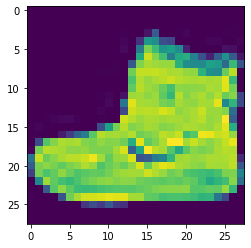

In [19]:
i = 0
img = train_images[i,:,:]
plt.imshow(img)
print(f"label:  {labels[train_labels[i]]}")

label:  T-shirt/top


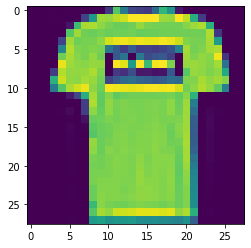

In [20]:
j = 1
img = train_images[j,:,:]
plt.imshow(img)
print(f"label:  {labels[train_labels[j]]}")

Fitting the model

In [22]:
history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)

Epoch 1/8
235/235 - 11s - loss: 0.3539 - sparse_categorical_accuracy: 0.8757 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 - 11s - loss: 0.3348 - sparse_categorical_accuracy: 0.8821 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 - 11s - loss: 0.3191 - sparse_categorical_accuracy: 0.8868 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 - 11s - loss: 0.3079 - sparse_categorical_accuracy: 0.8903 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 - 11s - loss: 0.2997 - sparse_categorical_accuracy: 0.8932 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 - 11s - loss: 0.2944 - sparse_categorical_accuracy: 0.8939 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 - 11s - loss: 0.2855 - sparse_categorical_accuracy: 0.8970 - mean_absolute_error: 4.4200
Epoch 8/8
235/235 - 11s - loss: 0.2787 - sparse_categorical_accuracy: 0.8991 - mean_absolute_error: 4.4200


Plotting training history

In [23]:
df = pd.DataFrame(history.history)
df.head(5)

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.353900,0.875733,4.420001
1,0.334756,0.882067,4.419999
2,0.319070,0.886850,4.420000
3,0.307944,0.890250,4.420002
4,0.299686,0.893200,4.420001


Making a plot for the model loss, accuracy, & mae

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

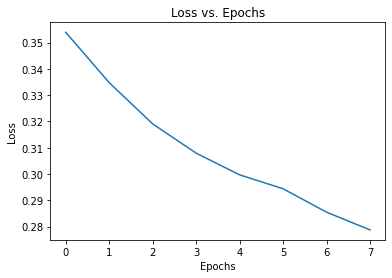

In [24]:
loss_plot = df.plot(y='loss', title = "Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

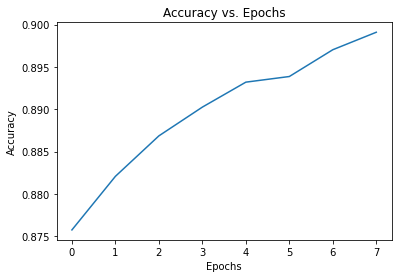

In [25]:
loss_plot = df.plot(y='sparse_categorical_accuracy', title = "Accuracy vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

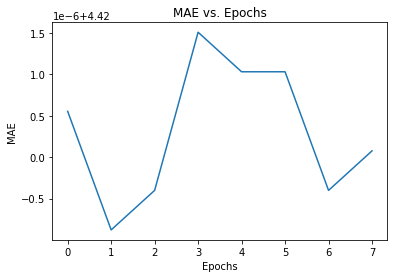

In [26]:
loss_plot = df.plot(y='mean_absolute_error', title = "MAE vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="MAE")

Evaluating the model on the test set

In [28]:
test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

313/313 - 1s - loss: 0.3164 - sparse_categorical_accuracy: 0.8892 - mean_absolute_error: 4.4200


Making predictions from the model

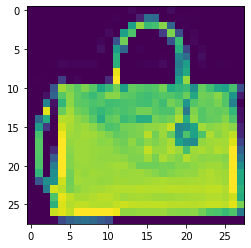

Label: Bag


In [29]:
random_inx = np.random.choice(test_images.shape[0])
inx = 30

test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[inx]]}")

Model prediction

In [30]:
predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model prediction: {labels[np.argmax(predictions)]}")

Model prediction: Bag
